**Linear Regression**




Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.
The goal of the algorithm is to find the best linear equation that can predict the value of the dependent variable based on the independent variables. The equation provides a straight line that represents the relationship between the dependent and independent variables. The slope of the line indicates how much the dependent variable changes for a unit change in the independent variable(s).

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/placement.csv")

In [ ]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'Package(in lpa)')

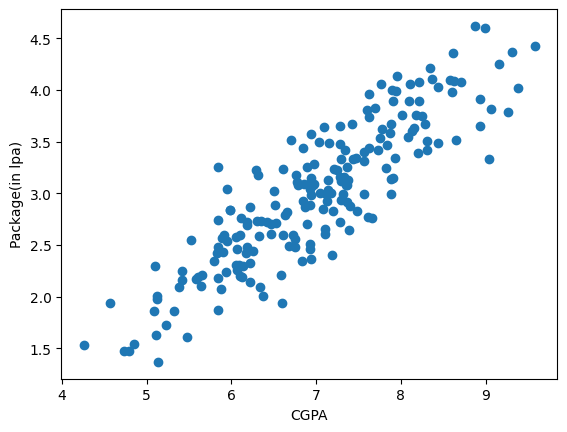

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [ ]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [ ]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

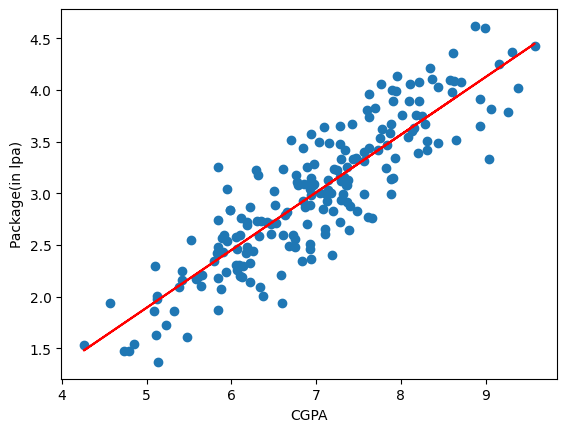

In [ ]:
%matplotlib inline
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_test, y_test, '+', label='Actual values')
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
b = lr.intercept_

In [ ]:
# y = mx + b
m = lr.coef_
m * 8.58 + b

array([3.89111601])

In [ ]:
m * 9.5 + b

array([4.40443183])

In [25]:
m * 100 + b

array([54.89908542])

In the above plot, there are observations given by the blue color, and prediction is given by the red regression line. As we can see, most of the observations are close to the regression line, hence we can say our Simple Linear Regression is a good model and able to make good predictions.

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
y_pred = lr.predict(X_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [28]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [29]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [30]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [31]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [32]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [33]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [35]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head(10)

,cgpa,random_feature,package
0,6.89,0.902275,3.26
1,5.12,0.404008,1.98
2,7.82,0.521452,3.25
3,7.42,0.325965,3.67
4,6.94,0.841499,3.57
5,7.89,0.960091,2.99
6,6.73,0.261057,2.60
7,6.75,0.073357,2.48
8,6.09,0.277437,2.31
9,8.31,0.744024,3.51


Text(0, 0.5, 'Package(in lpa)')

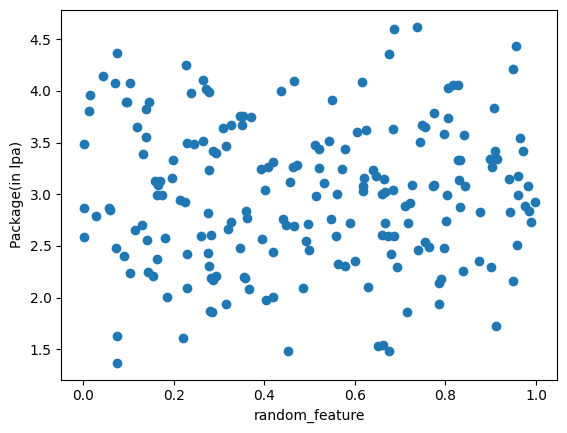

In [36]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [37]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [39]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7766933478448986


In [41]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7646227179986769

In [42]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [43]:
new_df2.sample(5)

,cgpa,iq,package
124,6.06,1.21,2.31
13,6.93,1.99,2.89
94,5.83,2.62,2.42
7,6.75,2.38,2.48
141,6.76,2.18,3.18


Text(0, 0.5, 'Package(in lpa)')

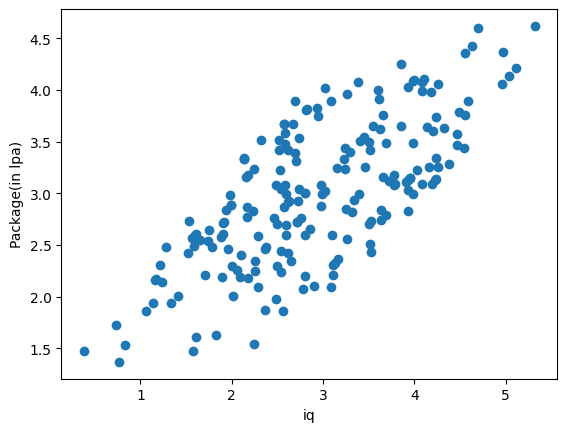

In [44]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [45]:
np.random.randint(-100,100)

40

In [46]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [49]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8036379322724111


In [50]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7930237664492982